I've been working on prediction with ESN. Up to now, I didn't renew model once it's learned. 

Let's see weather online learning approach works.

# Fetch Data and Prepare for Environment

In [2]:
!pip install matplotlib --upgrade
! pip install quandl

Requirement already up-to-date: matplotlib in /usr/local/lib/python2.7/dist-packages
Requirement already up-to-date: numpy>=1.6 in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: python-dateutil in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: pytz in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: cycler in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: pyparsing!=2.0.4,>=1.5.6 in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Cleaning up...
Cleaning up...


In [3]:
#generic
%matplotlib inline
from __future__ import print_function

import numpy as np
import time
import quandl 
import matplotlib.pyplot as plt

In [4]:
from yahoo_finance import Share

def get_data_by_key(key, data):
    data_it = iter(data)
    return_data = []
    flag = True
    for d in data_it:
        return_data.append(d[key])
        
    return np.array(return_data)

def get_data_by_list(name_list, start_date, end_date, data_type="Open"):
    share_list = []
    for name in name_list:
        share_list.append(Share(name))
    
    stock_data_list = []
    date = []
    flag = True
    N_data = 0
    fail_name_list = []
    for idx, share in enumerate(share_list):
        name = name_list[idx]
        hist_data = share.get_historical(start_date=start_date, end_date=end_date)
        stock_data = map(float, get_data_by_key(key=data_type, data=hist_data))
        date.append(get_data_by_key(key='Date', data=hist_data))
        stock_data_list.append(stock_data)
        N_data = len(stock_data)
        if N_data == 0:
            fail_name_list.append(name)
    print ("fail_name_list: ", fail_name_list)
    return np.array(stock_data_list).T, date

In [62]:
energy = ["PTR", "XOM", "CVX", "RDS-A", "BP", "TOT", "SLB", "KMI", "COP", "CEO", 
          "E", "STO", "OXY", "PBR", "EOG", "APC", "SU", "ENB", "HAL", "WMB"]
financial = ["WFC", "JPM", "HSBC", "BAC", "C", "SAN", "MTU", "RY", "WBK", "TD", "GS", 
             "LYG", "AXP", "AIG", "MS", "ITUB", "BCS", "BBVA"]
healthcare = ["NVS", "JNJ", "PFE", "MRK", "GILD", "SNY", "AMGN", "NVO", "GSK", "UNH",
             "MDT", "BMY", "CELG", "BIIB", "AZN", "LLY", "ABT", "AGN", "VRX", "TEVA",
             "TMO", "SHPG", "REGN"]
buisiness = ["ACN", "LMT", "CNI", "FDX", "DAL", "CSX", "AAL", "CP", "NSC", "NOC", "LUV"]
telecom = ["CHL", "VZ", "T", "VOD", "NTT", "AMX", "CHA", "BT", "CHU", "ORAN", "BCE",
           "CHT", "SKM", "TI", "TU", "S", "TLK", "DUK", "NGG", "NEE", "D", "SO", "EXC", "KEP",
          "AEP", "SRE", "PCG", "HNP", "PPL", "PEG", "EIX", "ETP", "ED", "ENI", "XEL", "ES", "FE"]
hardware = ["AAPL", "ORCL", "IBM", "INTC", "CSCO", "TSM", "QCOM", "HPQ", "TXN", "EMC",
           "CAJ", "ASML", "ERIC", "SNE", "AVGO", "MU", "GLW", "NXPI", "NOK",
           "AMAT", "WDC", "WIT", "ADI", "STX", "APH"]
software = ["MSFT", "GOOGL", "BIDU", "EBAY", "SAP", "CRM", "YHOO", "VMW",
            "ADBE", "CTSH", "INFY", "INTU", "LNKD", "RHT", "NTES", "CHKP", 
            "CA", "ADSK", "AKAM", "NVDA"]
industrial = ["GE", "V", "MA", "UTX", "MMM", "BA", "UNP", "UPS", "HON", "DHR", "CAT", 
              "ABB", "GD", "ADP", "EMR", "ITW", "ECL", "TEL", "PCAR", "WM"]
manufacturing = ["TM", "HMC", "F", "GM", "JCI", "TSLA", "TTM", "CMI", "DLPH", "MGA",
                "CMI", "DLPH", "MGA", "GPC", "BWA", "HOG", "ALV", "HAR", "LEA", "LKQ", 
                 "WBC", "GT", "FCAU", "NSANY", "NAV"]
consumer = ["PG", "BUD", "KO", "PEP", "UL", "PM", "BTI", "MO", "ABEV", "DEO", "MDLZ",
            "CL", "MON", "MCK", "KMB", "WHR", "DIS", "CMCSA", "FOXA", "TWX", "TWC",
           "DISH", "CBS", "DISCA", "TV", "CHTR", "QVCA", "OMC", "NLSN", 
           "PSO", "SJR", "NFLX"]
diversified = ["BRK-A", "BRK-B", "UTX", "BC", "RTN", "OLN", "ITT", "MSBHY", "KWHIY", 
               "ABB", "IEP", "GE"]
retailing = ["WMT", "AMZN", "HD", "MCD", "NKE", "SBUX", "CVS", "WBA", "PCLN", "COST", 
            "TGT", "TJX", "LVS", "YUM", "CCL", "LUX", "DG", "M", "AZO", "ROST", "CMG", "GPS", 
            "DLTR", "RCL", "KSS", "HOT", "JWN"]

input_list = energy + financial + healthcare + buisiness + telecom\
+ hardware + software + industrial + manufacturing + consumer + diversified + retailing
print (len(input_list))

270


In [63]:
print ("Started!!")

st = time.time()
start_date="2014-04-01"
end_date="2016-04-01"
input_data, date = get_data_by_list(input_list, start_date=start_date, end_date=end_date) 
sp = quandl.get("YAHOO/INDEX_GSPC", start_date=start_date, end_date=end_date)
target_data = np.array(sp['Open'])
elapsed = time.time() - st
print ("time for getting training_data:", elapsed)

Started!!
fail_name_list:  []
time for getting training_data: 1031.06228304


# Online Delay line reservoir (DLR)

In [85]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

class OnlineDLR(object):
    
    def __init__(
            self, N_in, N_middle, N_out, 
            activation=np.tanh, r=1.0, scale=0.8,
            W_in=None, W_middle=None, W_out=None
        ):
        """shape feature
        Args:
            N_in (int): The dimention of input
            N_middle (int): the number of hidden nodes
            N_out (int): the dimention of output
            activation (lambda): activation function of middle layer
            r (float): the value of connections
            W_* (np.array): weitght for each layer
        """
        
        self.N_in = N_in
        self.N_out = N_out
        self.N_middle = N_middle
        self.activation = activation
        self.middle = np.zeros(shape=self.N_middle)
    
        if W_middle is None:
            W_middle = np.zeros(shape=(N_middle, N_middle))
            for i in xrange(N_middle - 1):
                W_middle[i + 1][i] = r
            """
            #normalization
            print (W_middle)
            eig_max = np.max(np.abs(np.linalg.eigvals(W_middle)))
            print (np.abs(np.linalg.eigvals(W_middle)))
            W_middle = W_middle / eig_max * scale
            """
        self.W_middle = W_middle
        
        if W_in is None:
            W_in = np.random.uniform(low=-1.0, high=1.0, size=(N_middle, N_in))
        self.W_in = W_in
        
    def normalization(self, data):
        dev = np.sqrt(np.var(data, axis=0))
        mean = np.mean(data, axis=0)
        return (data - mean) / dev, mean, dev
        
        
    def online_predict(self, input_data, target_data, start_time, N_memory=100, L2=1.0e-2 ):
        # use log ratio data
        df_input_tilde = np.log(input_data[1:] / input_data[:-1])
        df_input, mean_ipt, dev_ipt = self.normalization(df_input_tilde)
        df_target_tilde = np.log(target_data[1:] / target_data[:-1])
        df_target, mean_tgt, dev_tgt = self.normalization(df_target_tilde)
        #keep deviance and mean for prediction
        self.input_mean = mean_ipt
        self.input_dev = dev_ipt
        self.output_mean = mean_tgt
        self.output_dev = dev_tgt
        
        N_data = len(df_input)
        Y = []
        X = []
        # initalization
        middle = np.zeros(shape=self.N_middle)
        output = np.zeros(shape=self.N_out)
        middle_data = []
        prediction = []
        for i in xrange(N_data - 1):
            middle = self.activation(
                np.dot(self.W_in, df_input[i])\
                + np.dot(self.W_middle, middle)
                )
            
            # start_time is time when starting learning
            if i >= start_time - 1:
                # minimize ||Y - X * W.T|| ** 2+ L2 * ||W|| ** 2
                Y.append(df_target[i])
                X.append(np.r_[df_input[i], middle])
                
            if i >= start_time + N_memory - 1:
                # print (i)
                X_tilde = np.array(X)
                Y_tilde = np.array(Y)
                if L2 == 0:
                    X_inv = np.real(np.linalg.pinv(X.T))
                else:
                    X_inv = np.dot(X_tilde, np.linalg.inv(L2 * np.identity(self.N_in + self.N_middle)\
                                                    + np.dot(X_tilde.T, X_tilde)))
                self.W_out = np.dot(Y_tilde.T, X_inv)
                # predict next one
                pre_out = np.r_[df_input[i + 1], middle]
                modified_out = self.output_dev * np.dot(self.W_out, pre_out) + self.output_mean
                prediction.append(np.exp(modified_out))
                # get rid of the past memeory to keep the fixed lenght memory
                del X[0]
                del Y[0]
        learned_data = target_data[start_time + N_memory:] * np.r_[1.0, np.array(prediction)]                
        
        return learned_data

learning_time: 65.5251660347


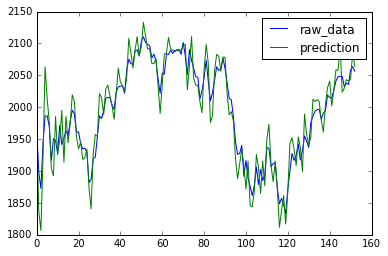

In [86]:
T = len(input_data)
N_middle = T
esn = OnlineDLR(N_in=len(input_data[0]), N_middle=N_middle, N_out=1, scale=0.8, r=0.5)
start_time = int(0.5 * T)
N_memory=100

st = time.time()
output_data = esn.online_predict(input_data=input_data, 
                           target_data=target_data, start_time=start_time,
                          N_memory=N_memory)
elapsed = time.time() - st
print ("learning_time:", elapsed)

plt.plot(target_data[start_time + N_memory:], label="raw_data")
plt.plot(output_data, label="prediction")
plt.legend()

This looks pretty well. Let's work on more small subsets of stock

# Finance

In [101]:
input_list = ["WFC", "JPM", "HSBC", "BAC", "C", "SAN", "MTU", "RY", "WBK", "TD", "GS", 
             "LYG", "AXP", "AIG", "MS", "ITUB", "BCS", "BBVA"]
print (len(input_list))

18


In [102]:
print ("Started!!")

st = time.time()
start_date="2014-04-01"
end_date="2016-04-01"
input_data, date = get_data_by_list(input_list, start_date=start_date, end_date=end_date) 
sp = quandl.get("YAHOO/INDEX_GSPC", start_date=start_date, end_date=end_date)
target_data = np.array(sp['Open'])
elapsed = time.time() - st
print ("time for getting training_data:", elapsed)

Started!!
fail_name_list:  []
time for getting training_data: 72.3187670708


learning_time: 65.6976799965


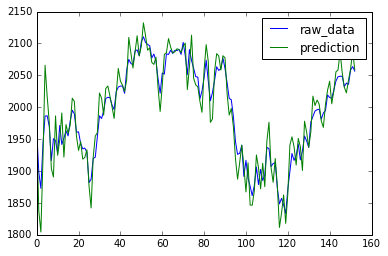

In [103]:
T = len(input_data)
N_middle = T
esn = OnlineDLR(N_in=len(input_data[0]), N_middle=N_middle, N_out=1, scale=0.8, r=0.5)
start_time = int(0.5 * T)
N_memory=100

st = time.time()
output_data = esn.online_predict(input_data=input_data, 
                           target_data=target_data, start_time=start_time,
                          N_memory=N_memory)
elapsed = time.time() - st
print ("learning_time:", elapsed)

plt.plot(target_data[start_time + N_memory:], label="raw_data")
plt.plot(output_data, label="prediction")
plt.legend()

# Enregy

In [104]:
input_list= ["PTR", "XOM", "CVX", "RDS-A", "BP", "TOT", "SLB", "KMI", "COP", "CEO", 
          "E", "STO", "OXY", "PBR", "EOG", "APC", "SU", "ENB", "HAL", "WMB"]
print (len(input_list))

20


In [105]:
print ("Started!!")

st = time.time()
start_date="2014-04-01"
end_date="2016-04-01"
input_data, date = get_data_by_list(input_list, start_date=start_date, end_date=end_date) 
# sp = quandl.get("YAHOO/INDEX_GSPC", start_date=start_date, end_date=end_date)
# target_data = np.array(sp['Open'])
elapsed = time.time() - st
print ("time for getting training_data:", elapsed)

Started!!
fail_name_list:  []
time for getting training_data: 76.4401299953


learning_time: 66.3192930222


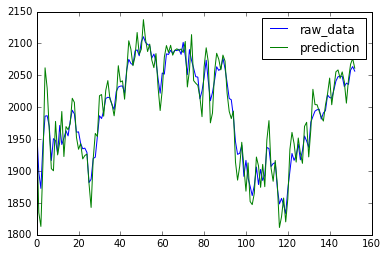

In [106]:
T = len(input_data)
N_middle = T
esn = OnlineDLR(N_in=len(input_data[0]), N_middle=N_middle, N_out=1, scale=0.8, r=0.5)
start_time = int(0.5 * T)
N_memory=100

st = time.time()
output_data = esn.online_predict(input_data=input_data, 
                           target_data=target_data, start_time=start_time,
                          N_memory=N_memory)
elapsed = time.time() - st
print ("learning_time:", elapsed)

plt.plot(target_data[start_time + N_memory:], label="raw_data")
plt.plot(output_data, label="prediction")
plt.legend()

# Healthcare

In [107]:
input_list= ["NVS", "JNJ", "PFE", "MRK", "GILD", "SNY", "AMGN", "NVO", "GSK", "UNH",
             "MDT", "BMY", "CELG", "BIIB", "AZN", "LLY", "ABT", "AGN", "VRX", "TEVA",
             "TMO", "SHPG", "REGN"]
print(len(input_list))

23


In [108]:
print ("Started!!")

st = time.time()
start_date="2014-04-01"
end_date="2016-04-01"
input_data, date = get_data_by_list(input_list, start_date=start_date, end_date=end_date) 
# sp = quandl.get("YAHOO/INDEX_GSPC", start_date=start_date, end_date=end_date)
# target_data = np.array(sp['Open'])
elapsed = time.time() - st
print ("time for getting training_data:", elapsed)

Started!!
fail_name_list:  []
time for getting training_data: 94.092015028


learning_time: 67.3359079361


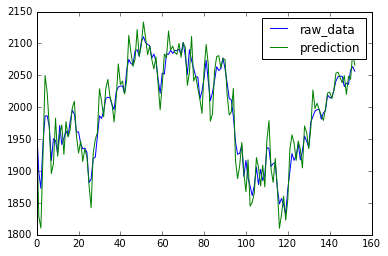

In [109]:
T = len(input_data)
N_middle = T
esn = OnlineDLR(N_in=len(input_data[0]), N_middle=N_middle, N_out=1, scale=0.8, r=0.5)
start_time = int(0.5 * T)
N_memory=100

st = time.time()
output_data = esn.online_predict(input_data=input_data, 
                           target_data=target_data, start_time=start_time,
                          N_memory=N_memory)
elapsed = time.time() - st
print ("learning_time:", elapsed)

plt.plot(target_data[start_time + N_memory:], label="raw_data")
plt.plot(output_data, label="prediction")
plt.legend()

# Buisiness

In [110]:
input_list = ["ACN", "LMT", "CNI", "FDX", "DAL", "CSX", "AAL", "CP", "NSC", "NOC", "LUV"]
print(len(input_list))

11


In [111]:
print ("Started!!")

st = time.time()
start_date="2014-04-01"
end_date="2016-04-01"
input_data, date = get_data_by_list(input_list, start_date=start_date, end_date=end_date) 
# sp = quandl.get("YAHOO/INDEX_GSPC", start_date=start_date, end_date=end_date)
# target_data = np.array(sp['Open'])
elapsed = time.time() - st
print ("time for getting training_data:", elapsed)

Started!!
fail_name_list:  []
time for getting training_data: 35.4589898586


learning_time: 63.1671431065


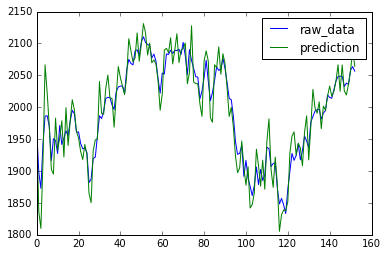

In [112]:
T = len(input_data)
N_middle = T
esn = OnlineDLR(N_in=len(input_data[0]), N_middle=N_middle, N_out=1, scale=0.8, r=0.5)
start_time = int(0.5 * T)
N_memory=100

st = time.time()
output_data = esn.online_predict(input_data=input_data, 
                           target_data=target_data, start_time=start_time,
                          N_memory=N_memory)
elapsed = time.time() - st
print ("learning_time:", elapsed)

plt.plot(target_data[start_time + N_memory:], label="raw_data")
plt.plot(output_data, label="prediction")
plt.legend()

# Let's work on more small subsets!

In [114]:
input_list = ["PTR", "WFC", "NVS", "ACN", "CHL", 
              "AAPL", "MSFT", "GE", "TM", "PG", "BRK-A", "WMT"]
print (len(input_list))

12


In [115]:
print ("Started!!")

st = time.time()
start_date="2014-04-01"
end_date="2016-04-01"
input_data, date = get_data_by_list(input_list, start_date=start_date, end_date=end_date) 
# sp = quandl.get("YAHOO/INDEX_GSPC", start_date=start_date, end_date=end_date)
# target_data = np.array(sp['Open'])
elapsed = time.time() - st
print ("time for getting training_data:", elapsed)

Started!!
fail_name_list:  []
time for getting training_data: 41.0055279732


learning_time: 63.592509985


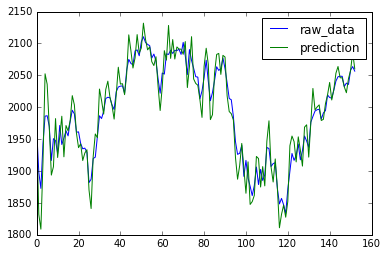

In [116]:
T = len(input_data)
N_middle = T
esn = OnlineDLR(N_in=len(input_data[0]), N_middle=N_middle, N_out=1, scale=0.8, r=0.5)
start_time = int(0.5 * T)
N_memory=100

st = time.time()
output_data = esn.online_predict(input_data=input_data, 
                           target_data=target_data, start_time=start_time,
                          N_memory=N_memory)
elapsed = time.time() - st
print ("learning_time:", elapsed)

plt.plot(target_data[start_time + N_memory:], label="raw_data")
plt.plot(output_data, label="prediction")
plt.legend()

# More small subsets

In [117]:
input_list = ["PTR", "WFC"]
print (len(input_list))

2


In [118]:
print ("Started!!")

st = time.time()
start_date="2014-04-01"
end_date="2016-04-01"
input_data, date = get_data_by_list(input_list, start_date=start_date, end_date=end_date) 
# sp = quandl.get("YAHOO/INDEX_GSPC", start_date=start_date, end_date=end_date)
# target_data = np.array(sp['Open'])
elapsed = time.time() - st
print ("time for getting training_data:", elapsed)

Started!!
fail_name_list:  []
time for getting training_data: 9.62630796432


learning_time: 60.1017279625


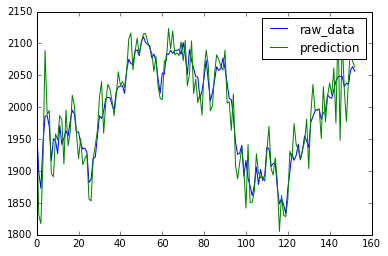

In [119]:
T = len(input_data)
N_middle = T
esn = OnlineDLR(N_in=len(input_data[0]), N_middle=N_middle, N_out=1, scale=0.8, r=0.5)
start_time = int(0.5 * T)
N_memory=100

st = time.time()
output_data = esn.online_predict(input_data=input_data, 
                           target_data=target_data, start_time=start_time,
                          N_memory=N_memory)
elapsed = time.time() - st
print ("learning_time:", elapsed)

plt.plot(target_data[start_time + N_memory:], label="raw_data")
plt.plot(output_data, label="prediction")
plt.legend()

learning_time: 60.15625


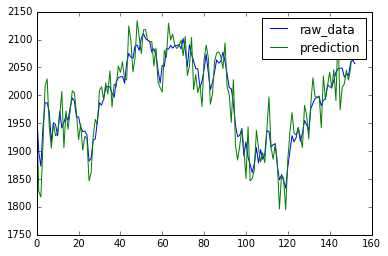

In [121]:
T = len(input_data)
N_middle = T
esn = OnlineDLR(N_in=len(input_data[0]), N_middle=N_middle, N_out=1,
                scale=0.8, r=0.5)
start_time = int(0.5 * T)
N_memory=100

st = time.time()
output_data = esn.online_predict(input_data=input_data, 
                           target_data=target_data, start_time=start_time,
                          N_memory=N_memory, L2=1.0e-5)
elapsed = time.time() - st
print ("learning_time:", elapsed)

plt.plot(target_data[start_time + N_memory:], label="raw_data")
plt.plot(output_data, label="prediction")
plt.legend()

In [122]:
energy = ["PTR", "XOM", "CVX", "RDS-A", "BP", "TOT", "SLB", "KMI", "COP", "CEO", 
          "E", "STO", "OXY", "PBR", "EOG", "APC", "SU", "ENB", "HAL", "WMB"]
financial = ["WFC", "JPM", "HSBC", "BAC", "C", "SAN", "MTU", "RY", "WBK", "TD", "GS", 
             "LYG", "AXP", "AIG", "MS", "ITUB", "BCS", "BBVA"]
healthcare = ["NVS", "JNJ", "PFE", "MRK", "GILD", "SNY", "AMGN", "NVO", "GSK", "UNH",
             "MDT", "BMY", "CELG", "BIIB", "AZN", "LLY", "ABT", "AGN", "VRX", "TEVA",
             "TMO", "SHPG", "REGN"]
buisiness = ["ACN", "LMT", "CNI", "FDX", "DAL", "CSX", "AAL", "CP", "NSC", "NOC", "LUV"]
telecom = ["CHL", "VZ", "T", "VOD", "NTT", "AMX", "CHA", "BT", "CHU", "ORAN", "BCE",
           "CHT", "SKM", "TI", "TU", "S", "TLK", "DUK", "NGG", "NEE", "D", "SO", "EXC", "KEP",
          "AEP", "SRE", "PCG", "HNP", "PPL", "PEG", "EIX", "ETP", "ED", "ENI", "XEL", "ES", "FE"]
hardware = ["AAPL", "ORCL", "IBM", "INTC", "CSCO", "TSM", "QCOM", "HPQ", "TXN", "EMC",
           "CAJ", "ASML", "ERIC", "SNE", "AVGO", "MU", "GLW", "NXPI", "NOK",
           "AMAT", "WDC", "WIT", "ADI", "STX", "APH"]
software = ["MSFT", "GOOGL", "BIDU", "EBAY", "SAP", "CRM", "YHOO", "VMW",
            "ADBE", "CTSH", "INFY", "INTU", "LNKD", "RHT", "NTES", "CHKP", 
            "CA", "ADSK", "AKAM", "NVDA"]
industrial = ["GE", "V", "MA", "UTX", "MMM", "BA", "UNP", "UPS", "HON", "DHR", "CAT", 
              "ABB", "GD", "ADP", "EMR", "ITW", "ECL", "TEL", "PCAR", "WM"]
manufacturing = ["TM", "HMC", "F", "GM", "JCI", "TSLA", "TTM", "CMI", "DLPH", "MGA",
                "CMI", "DLPH", "MGA", "GPC", "BWA", "HOG", "ALV", "HAR", "LEA", "LKQ", 
                 "WBC", "GT", "FCAU", "NSANY", "NAV"]
consumer = ["PG", "BUD", "KO", "PEP", "UL", "PM", "BTI", "MO", "ABEV", "DEO", "MDLZ",
            "CL", "MON", "MCK", "KMB", "WHR", "DIS", "CMCSA", "FOXA", "TWX", "TWC",
           "DISH", "CBS", "DISCA", "TV", "CHTR", "QVCA", "OMC", "NLSN", 
           "PSO", "SJR", "NFLX"]
diversified = ["BRK-A", "BRK-B", "UTX", "BC", "RTN", "OLN", "ITT", "MSBHY", "KWHIY", 
               "ABB", "IEP", "GE"]
retailing = ["WMT", "AMZN", "HD", "MCD", "NKE", "SBUX", "CVS", "WBA", "PCLN", "COST", 
            "TGT", "TJX", "LVS", "YUM", "CCL", "LUX", "DG", "M", "AZO", "ROST", "CMG", "GPS", 
            "DLTR", "RCL", "KSS", "HOT", "JWN"]

input_list = energy + financial + healthcare + buisiness + telecom\
+ hardware + software + industrial + manufacturing + consumer + diversified + retailing
print (len(input_list))

270


In [126]:
print ("Started!!")

st = time.time()
start_date="2014-04-01"
end_date="2016-04-01"
input_data, date = get_data_by_list(input_list, start_date=start_date, end_date=end_date) 
# sp = quandl.get("YAHOO/INDEX_GSPC", start_date=start_date, end_date=end_date)
# target_data = np.array(sp['Open'])
elapsed = time.time() - st
print ("time for getting training_data:", elapsed)

Started!!
fail_name_list:  []
time for getting training_data: 1011.31423211


learning_time: 202.158833981


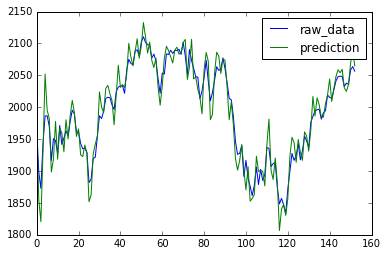

In [127]:
T = len(input_data)
N_middle = T
esn = OnlineDLR(N_in=len(input_data[0]), N_middle=N_middle, N_out=1,
                scale=0.8, r=0.5)
start_time = int(0.5 * T)
N_memory=100

st = time.time()
output_data = esn.online_predict(input_data=input_data, 
                           target_data=target_data, start_time=start_time,
                          N_memory=N_memory, L2=1.0e-5)
elapsed = time.time() - st
print ("learning_time:", elapsed)

plt.plot(target_data[start_time + N_memory:], label="raw_data")
plt.plot(output_data, label="prediction")
plt.legend()

learning_time: 201.583676815


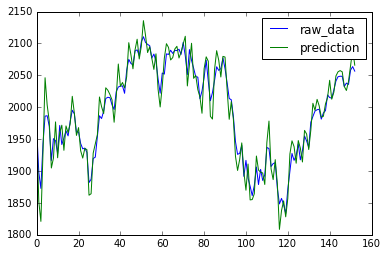

In [128]:
T = len(input_data)
N_middle = T
esn = OnlineDLR(N_in=len(input_data[0]), N_middle=N_middle, N_out=1,
                scale=0.8, r=0.5)
start_time = int(0.5 * T)
N_memory=100

st = time.time()
output_data = esn.online_predict(input_data=input_data, 
                           target_data=target_data, start_time=start_time,
                          N_memory=N_memory, L2=1.0e-4)
elapsed = time.time() - st
print ("learning_time:", elapsed)

plt.plot(target_data[start_time + N_memory:], label="raw_data")
plt.plot(output_data, label="prediction")
plt.legend()

learning_time: 201.570036173


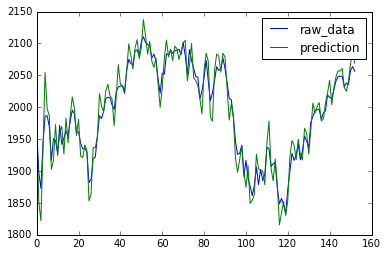

In [129]:
T = len(input_data)
N_middle = T
esn = OnlineDLR(N_in=len(input_data[0]), N_middle=N_middle, N_out=1,
                scale=0.8, r=0.5)
start_time = int(0.5 * T)
N_memory=100

st = time.time()
output_data = esn.online_predict(input_data=input_data, 
                           target_data=target_data, start_time=start_time,
                          N_memory=N_memory, L2=1.0e-3)
elapsed = time.time() - st
print ("learning_time:", elapsed)

plt.plot(target_data[start_time + N_memory:], label="raw_data")
plt.plot(output_data, label="prediction")
plt.legend()

learning_time: 201.542932987


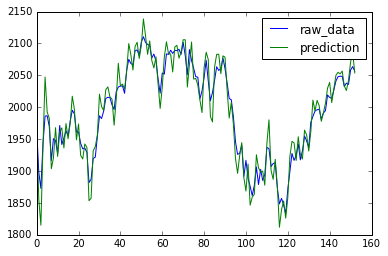

In [130]:
T = len(input_data)
N_middle = T
esn = OnlineDLR(N_in=len(input_data[0]), N_middle=N_middle, N_out=1,
                scale=0.9, r=0.5)
start_time = int(0.5 * T)
N_memory=100

st = time.time()
output_data = esn.online_predict(input_data=input_data, 
                           target_data=target_data, start_time=start_time,
                          N_memory=N_memory, L2=1.0e-2)
elapsed = time.time() - st
print ("learning_time:", elapsed)

plt.plot(target_data[start_time + N_memory:], label="raw_data")
plt.plot(output_data, label="prediction")
plt.legend()

learning_time: 201.597297907


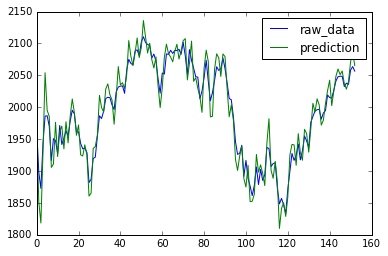

In [131]:
T = len(input_data)
N_middle = T
esn = OnlineDLR(N_in=len(input_data[0]), N_middle=N_middle, N_out=1,
                scale=0.99, r=0.5)
start_time = int(0.5 * T)
N_memory=100

st = time.time()
output_data = esn.online_predict(input_data=input_data, 
                           target_data=target_data, start_time=start_time,
                          N_memory=N_memory, L2=1.0e-5)
elapsed = time.time() - st
print ("learning_time:", elapsed)

plt.plot(target_data[start_time + N_memory:], label="raw_data")
plt.plot(output_data, label="prediction")
plt.legend()

learning_time: 201.665423155


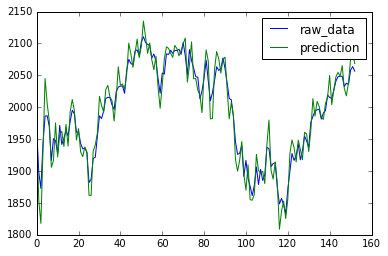

In [132]:
T = len(input_data)
N_middle = T
esn = OnlineDLR(N_in=len(input_data[0]), N_middle=N_middle, N_out=1,
                scale=0.8, r=0.8)
start_time = int(0.5 * T)
N_memory=100

st = time.time()
output_data = esn.online_predict(input_data=input_data, 
                           target_data=target_data, start_time=start_time,
                          N_memory=N_memory, L2=1.0e-5)
elapsed = time.time() - st
print ("learning_time:", elapsed)

plt.plot(target_data[start_time + N_memory:], label="raw_data")
plt.plot(output_data, label="prediction")
plt.legend()

learning_time: 201.717803955


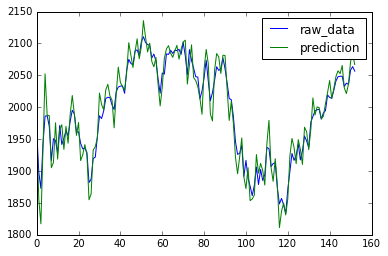

In [133]:
T = len(input_data)
N_middle = T
esn = OnlineDLR(N_in=len(input_data[0]), N_middle=N_middle, N_out=1,
                scale=0.8, r=1.0)
start_time = int(0.5 * T)
N_memory=100

st = time.time()
output_data = esn.online_predict(input_data=input_data, 
                           target_data=target_data, start_time=start_time,
                          N_memory=N_memory, L2=1.0e-5)
elapsed = time.time() - st
print ("learning_time:", elapsed)

plt.plot(target_data[start_time + N_memory:], label="raw_data")
plt.plot(output_data, label="prediction")
plt.legend()

As a comparison, I'll try regressions.

# Ridge Regression

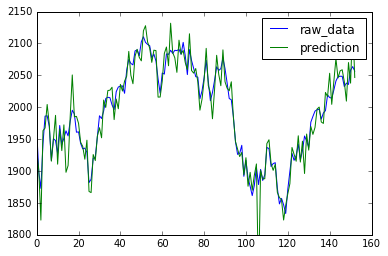

In [161]:
from sklearn import linear_model


regr = linear_model.LinearRegression()
df_input = np.log(input_data[1:] / input_data[:-1])
df_target = np.log(target_data[1:] / target_data[:-1])
N_data = len(df_input)
output = []
for i in xrange(1, N_data):
    regr.fit(df_input[0: i], df_target[0: i])
    output.append(regr.predict(df_input[i]))
output = np.r_[1.0, np.exp(np.array(output).reshape(N_data - 1))]
output_data = target_data[1:] * output

plt.ylim(1800, 2150)
plt.plot(target_data[start_time + N_memory:], label="raw_data")
plt.plot(output_data[start_time + N_memory - 1:], label="prediction")
plt.legend()

plt.legend()


# Lasso Regression

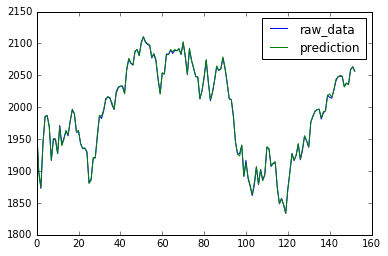

In [162]:
from sklearn.linear_model import Lasso

from sklearn import linear_model

regr = Lasso(alpha=1.0e-5)
df_input = np.log(input_data[1:] / input_data[:-1])
df_target = np.log(target_data[1:] / target_data[:-1])
N_data = len(df_input)
output = []
for i in xrange(1, N_data):
    regr.fit(df_input[0: i], df_target[0: i])
    output.append(regr.predict(df_input[i]))
output = np.r_[1.0, np.exp(np.array(output).reshape(N_data - 1))]
output_data = target_data[1:] * output

plt.plot(target_data[start_time + N_memory:], label="raw_data")
plt.plot(output_data[start_time + N_memory - 1:], label="prediction")
plt.legend()

plt.legend()

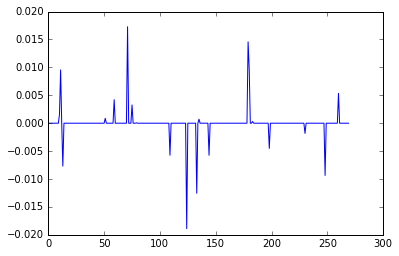

In [163]:
plt.plot(regr.coef_)

# Accuracy Measure

To compare models quantitively, let's compute squred error.

learning_time: 203.109912872
sqruared error:
8.87677976006e-05


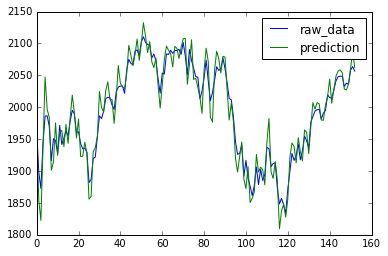

In [174]:
T = len(input_data)
N_middle = T
esn = OnlineDLR(N_in=len(input_data[0]), N_middle=N_middle, N_out=1,
                scale=0.8, r=0.5)
start_time = int(0.5 * T)
N_memory=100

st = time.time()
output_data = esn.online_predict(input_data=input_data, 
                           target_data=target_data, start_time=start_time,
                          N_memory=N_memory, L2=1.0e-5)
elapsed = time.time() - st
print ("learning_time:", elapsed)

y = target_data[start_time + N_memory:]
plt.plot(y, label="raw_data")
plt.plot(output_data, label="prediction")
plt.legend()

error = np.mean(((y - output_data) / y) ** 2)
print ("sqruared error:")
print (error)

sqruared error:
0.000144854286445


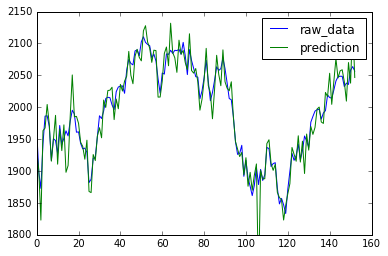

In [175]:
from sklearn import linear_model


regr = linear_model.LinearRegression()
df_input = np.log(input_data[1:] / input_data[:-1])
df_target = np.log(target_data[1:] / target_data[:-1])
N_data = len(df_input)
output = []
for i in xrange(1, N_data):
    regr.fit(df_input[0: i], df_target[0: i])
    output.append(regr.predict(df_input[i]))
output = np.r_[1.0, np.exp(np.array(output).reshape(N_data - 1))]
output_data = target_data[1:] * output

plt.ylim(1800, 2150)
y = target_data[start_time + N_memory:]
y_hat = output_data[start_time + N_memory - 1:]
plt.plot(target_data[start_time + N_memory:], label="raw_data")
plt.plot(output_data[start_time + N_memory - 1:], label="prediction")
plt.legend()

plt.legend()

error = np.mean(((y - y_hat) / y) ** 2)
print ("sqruared error:")
print (error)

sqruared error:
5.70561706872e-07


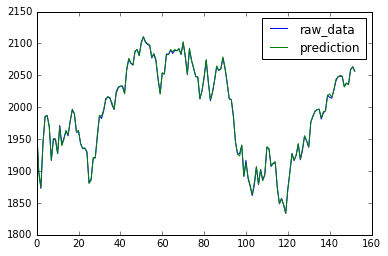

In [176]:
from sklearn.linear_model import Lasso

regr = Lasso(alpha=1.0e-5)
df_input = np.log(input_data[1:] / input_data[:-1])
df_target = np.log(target_data[1:] / target_data[:-1])
N_data = len(df_input)
output = []
for i in xrange(1, N_data):
    regr.fit(df_input[0: i], df_target[0: i])
    output.append(regr.predict(df_input[i]))
output = np.r_[1.0, np.exp(np.array(output).reshape(N_data - 1))]
output_data = target_data[1:] * output

plt.ylim(1800, 2150)
y = target_data[start_time + N_memory:]
y_hat = output_data[start_time + N_memory - 1:]
plt.plot(target_data[start_time + N_memory:], label="raw_data")
plt.plot(output_data[start_time + N_memory - 1:], label="prediction")
plt.legend()

plt.legend()

error = np.mean(((y - y_hat) / y) ** 2)
print ("sqruared error:")
print (error)

# Offline Version

In [177]:
T= len(input_data)
N_data = int(0.5 * T)
train_input = input_data[:N_data]
train_target = target_data[:N_data]
test_input = input_data[N_data:]
test_target = target_data[N_data:]

In [178]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

class DLR(object):
    
    def __init__(
            self, N_in, N_middle, N_out, 
            activation=np.tanh, r=1.0, scale=0.8, alpha=1.0,
            W_in=None, W_middle=None, W_out=None
        ):
        """shape feature
        Args:
            N_in (int): The dimention of input
            N_middle (int): the number of hidden nodes
            N_out (int): the dimention of output
            activation (lambda): activation function of middle layer
            r (float): the value of connections
            W_* (np.array): weitght for each layer
        """
        
        self.N_in = N_in
        self.N_out = N_out
        self.N_middle = N_middle
        self.activation = activation
        self.middle = np.zeros(shape=self.N_middle)
    
        if W_middle is None:
            W_middle = np.zeros(shape=(N_middle, N_middle))
            for i in xrange(N_middle - 1):
                W_middle[i + 1][i] = r
            """
            #normalization
            print (W_middle)
            eig_max = np.max(np.abs(np.linalg.eigvals(W_middle)))
            print (np.abs(np.linalg.eigvals(W_middle)))
            W_middle = W_middle / eig_max * scale
            """
        self.W_middle = W_middle
        
        if W_in is None:
            W_in = np.random.uniform(low=-alpha, high=alpha, size=(N_middle, N_in))
        self.W_in = W_in
        
    def normalization(self, data):
        dev = np.sqrt(np.var(data, axis=0))
        mean = np.mean(data, axis=0)
        return (data - mean) / dev, mean, dev
        
        
    def learning(self, input_data, target_data, start_time, L2=1.0e-2):
        # use log ratio data
        df_input_tilde = input_data[1:] / input_data[:-1]
        df_input, mean_ipt, dev_ipt = self.normalization(df_input_tilde)
        df_target_tilde = target_data[1:] / target_data[:-1]
        df_target, mean_tgt, dev_tgt = self.normalization(df_target_tilde)
        #keep deviance and mean for prediction
        self.input_mean = mean_ipt
        self.input_dev = dev_ipt
        self.output_mean = mean_tgt
        self.output_dev = dev_tgt
        
        N_data = len(df_input)
        Y = []
        X = []
        # initalization
        middle = np.zeros(shape=self.N_middle)
        output = np.zeros(shape=self.N_out)
        middle_data = []
        for i in xrange(N_data):
            new_m = self.activation(
                np.dot(self.W_in, df_input[i])\
                + np.dot(self.W_middle, middle)
                )
            
            if i >= start_time:
                # minimize ||Y - X * W.T|| ** 2+ L2 * ||W|| ** 2
                Y.append(df_target[i])
                X.append(np.r_[df_input[i], new_m])
            
            middle = new_m  
            middle_data.append(middle)
           
        Y = np.array(Y)
        X = np.array(X)
        #keep middle data for predcition
        self.middle = middle
                                    
        if L2 == 0:
            X_inv = np.real(np.linalg.pinv(X.T))
        else:
            X_inv = np.dot(X, np.linalg.inv(L2 * np.identity(self.N_in + self.N_middle) + np.dot(X.T, X)))
        self.W_out = np.dot(Y.T, X_inv)
        pre_out = np.c_[df_input, middle_data]
        modified_out = self.output_dev * np.dot(self.W_out, pre_out[start_time:].T).T + self.output_mean
        accumulated_price = np.cumprod(modified_out)
        learned_data = target_data[start_time] * np.r_[1.0, accumulated_price]
        return learned_data
    
    def predict(self, input_data, sig=0):
        df_input_tilde = input_data[1:] / input_data[:-1]
        df_input = (df_input_tilde - self.input_mean) / self.input_dev
        N_data = len(df_input)
        #initalization
        middle = self.middle.copy()
        output_data = []
        for i in xrange(N_data):
            new_m = self.activation(np.dot(self.W_in, df_input[i]) \
                                    + np.dot(self.W_middle, middle)) + sig*np.random.randn(self.N_middle)
            output = np.dot(self.W_out, np.r_[df_input[i], new_m])
            middle = new_m
            output_data.append(output)
        output_data_tilde = (self.output_dev * np.array(output_data) + self.output_mean).T
        accumulated_price = np.cumprod(output_data_tilde)
        return np.r_[1.0, accumulated_price]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:94: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:96: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


learning_time: 11.212031126
prediction time: 0.702265977859


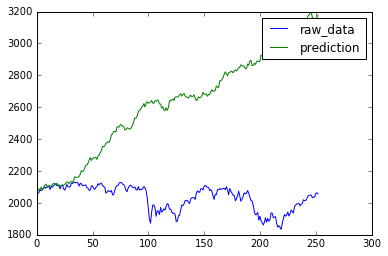

In [182]:
T = len(train_input)
N_middle = T * 5
esn = DLR(N_in=len(train_input[0]), N_middle=N_middle, N_out=1, scale=0.8, r=1.0,
          activation=sigmoid, alpha=10)
start_time = 0.1 * T

st = time.time()
output_data = esn.learning(input_data=train_input, 
                           target_data=train_target, start_time=start_time)
elapsed = time.time() - st
print ("learning_time:", elapsed)

st = time.time()
output_data_pred = test_target[0] * esn.predict(test_input)
elapsed = time.time() - st
print ("prediction time:", elapsed)

plt.plot(test_target, label="raw_data")
plt.plot(output_data_pred, label="prediction")
plt.legend()

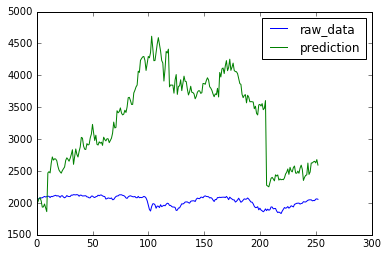

In [190]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
df_input = np.log(train_input[1:] / train_input[:-1])
df_target = np.log(train_target[1:] / train_target[:-1])
regr.fit(df_input, df_target)
test_df_input = np.log(test_input[1:]/test_input[:-1])
output = regr.predict(test_df_input)
output = np.r_[1.0, np.exp(np.array(output))]
output_data_pred = test_target[0] * np.cumprod(output)

plt.plot(test_target, label="raw_data")
plt.plot(output_data_pred, label="prediction")
plt.legend()

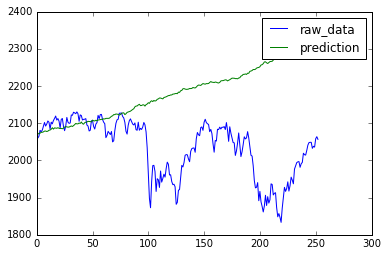

In [189]:
from sklearn.linear_model import Lasso

regr = Lasso(alpha=1.0e-5)
df_input = np.log(train_input[1:] / train_input[:-1])
df_target = np.log(train_target[1:] / train_target[:-1])
regr.fit(df_input, df_target)
test_df_input = np.log(test_input[1:]/test_input[:-1])
output = regr.predict(test_df_input)
output = np.r_[1.0, np.exp(np.array(output))]
output_data_pred = test_target[0] * np.cumprod(output)

plt.plot(test_target, label="raw_data")
plt.plot(output_data_pred, label="prediction")
plt.legend()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:94: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:96: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


learning_time: 11.2429671288
prediction time: 0.77272605896


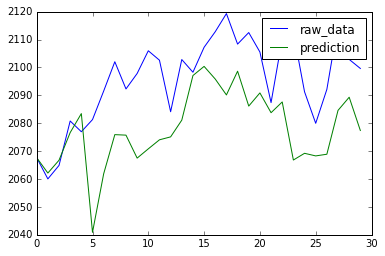

In [191]:
T = len(train_input)
N_middle = T * 5
esn = DLR(N_in=len(train_input[0]), N_middle=N_middle, N_out=1, scale=0.8, r=1.0,
          activation=sigmoid, alpha=10)
start_time = 0.1 * T

st = time.time()
output_data = esn.learning(input_data=train_input, 
                           target_data=train_target, start_time=start_time)
elapsed = time.time() - st
print ("learning_time:", elapsed)

st = time.time()
output_data_pred = test_target[0] * esn.predict(test_input)
elapsed = time.time() - st
print ("prediction time:", elapsed)

plt.plot(test_target[:30], label="raw_data")
plt.plot(output_data_pred[:30], label="prediction")
plt.legend()

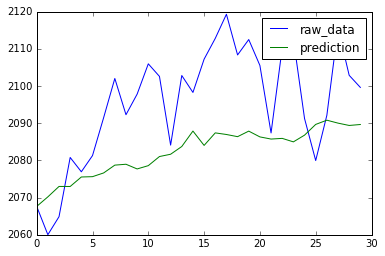

In [192]:
from sklearn.linear_model import Lasso

regr = Lasso(alpha=1.0e-5)
df_input = np.log(train_input[1:] / train_input[:-1])
df_target = np.log(train_target[1:] / train_target[:-1])
regr.fit(df_input, df_target)
test_df_input = np.log(test_input[1:]/test_input[:-1])
output = regr.predict(test_df_input)
output = np.r_[1.0, np.exp(np.array(output))]
output_data_pred = test_target[0] * np.cumprod(output)

plt.plot(test_target[:30], label="raw_data")
plt.plot(output_data_pred[:30], label="prediction")
plt.legend()